In [1]:
# Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import requests

In [2]:
# Python program to get a google map 
# image of specified location using 
# Google Static Maps API
  
# Enter your api key here
api_key = "your api key goes here"
  
# url variable store url
url = "https://maps.googleapis.com/maps/api/staticmap?"
  
# center defines the center of the map,
# equidistant from all edges of the map.
# this will be lat and long coordinates
center = "25.2548029,51.53747"
  
# zoom defines the zoom
# level of the map
# zoom value of 15 is at street level and draws 1 square km area
zoom = 15
  
# get method of requests module
# return response object
r = requests.get(url + "center=" + center + "&zoom=" +
                   str(zoom) + "&size=400x400&maptype=satellite&key=" +
                             api_key)
  
# wb mode is stand for write binary mode
f = open('map.png', 'wb')
  
# r.content gives content,
# in this case gives image
f.write(r.content)
  
# close method of file object
# save and close the file
f.close()

In [3]:
# loading the image in RGB color space
original_image = cv2.imread("map.png")

In [4]:
# converting BGR to RGB for better processing
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [5]:
# converts the MxNx3 image into a Kx3 matrix where K=MxN and each row is now a vector in the 3-D space of RGB.
vectorized = img.reshape((-1,3))

In [6]:
# convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.
vectorized = np.float32(vectorized)

In [7]:
# Define criteria, number of clusters(K) and apply k-means()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [8]:
# k = 4 seems to work best as the 4 clsuters correspond to buildings, roads, trees and fields
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [9]:
# Now convert back into uint8
center = np.uint8(center)

In [10]:
# Next, we have to access the labels to regenerate the clustered image
res = center[label.flatten()]
result_image = res.reshape((img.shape))

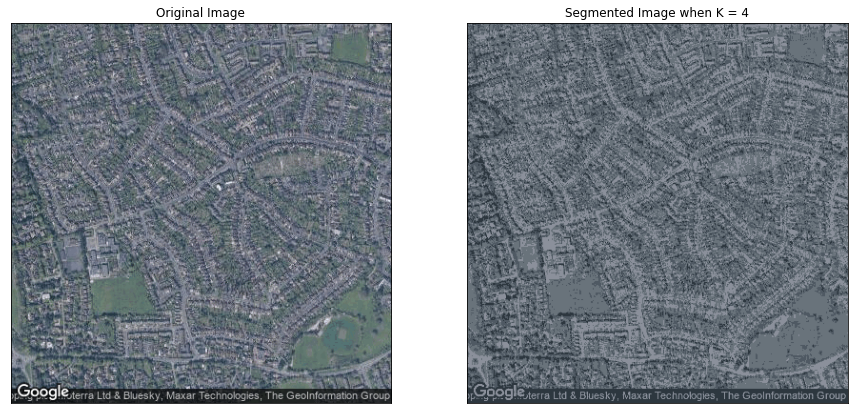

In [11]:
# result_image is the result of the frame which has undergone k-means clustering.
# Now let us visualize the output result with K=4
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
# RGB values for 4 clusters that we get
center

array([[139, 144, 155],
       [ 79,  89,  99],
       [ 45,  55,  63],
       [105, 115, 123]], dtype=uint8)

In [13]:
# passing on to dataframe to understand composition
df = pd.DataFrame(label, columns = ['label'])
df.value_counts()

label
3        68119
1        45645
0        32084
2        14152
dtype: int64

In [14]:
# segregating all labels for greens by using hard coded rule based on RGB separation
green_label = []
for a in range(4):
    if (center[a][0]<=center[a][1] and center[a][1]<=120):
        green_label.append(a)
    else:
        pass

green_label
        


[1, 2, 3]

In [15]:
# count the number of pixels from total to get composition of green labels 
gr_idx = 0
if len(green_label) == 1:
    for i in range(label.size):
        if (label[i] == green_label[0]):
            gr_idx += 1
elif len(green_label) == 2:
    for i in range(label.size):
        if (label[i] == green_label[0] or label[i] == green_label[1]):
            gr_idx += 1
elif len(green_label) == 3:
    for i in range(label.size):
        if (label[i] == green_label[0] or label[i] == green_label[1] or label[i] == green_label[2]):
            gr_idx += 1
elif len(green_label) == 2:
    for i in range(label.size):
        if (label[i] == green_label[0] or label[i] == green_label[1] or label[i] == green+label[2] or label[i] == green+label[3]):
            gr_idx += 1

            
green_index = round((gr_idx/label.size)*100)
print("green_index is:", green_index)

green_index is: 80
